<h1 style = "color : #3D737D; text-align : center;"><em>City Hospital</em> - Data Preprocessing & Exploratory Analysis</h1>
<br>
<p style = "font-size : 12px; text-align: center;"><b>NOVA IMS</b></p>
<p style = "font-size : 10px; text-align: center;">Data Preprocessing and Visualization</p>
<p style = "font-size : 10px; text-align: center;">GROUP 8: Diogo Gonçalves, João Marques, Juan Mendes & Gustavo Franco</p>
<br>

<hr style = "border: 3px solid #3D737D;">
<h2  style = "color : #3D737D;text-align : center;"> Project Setup & Data Loading</h2>

<h3  style = "color : #3D737D;"> Imports</h3>

In [1076]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

<h3  style = "color : #3D737D;"> Dataset Loading</h3>

<p style = "font-size : 15px;">Reading of dataset from <code>Project Data.xlsx</code> file</p>

In [1077]:
project_data = pd.read_excel('Project Data.xlsx')

<hr style = "border: 3px solid #3D737D;">
<h2  style = "color : #3D737D;text-align : center;"> Part A - Data Understanding & Cleaning</h2>

<h3 style = "color : #3D737D;">Dataset Assessment</h3>

In [1078]:
project_data.head()

,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
0,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-02-22,Endocrinology,110,2,38839.0,293.014042,0.0
1,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-01-21,Emergency,76,4,52219.0,287.208982,0.0
2,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-06-13,Neurology,17,5,41491.0,241.254507,0.0
3,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-24,Emergency,15,3,34944.0,221.177483,0.0
4,1482,65.0,Female,Birmingham,Retired,NaN,Heart Disease,Master,Divorced,2024-03-19,Neurology,99,1,39248.0,219.743794,0.0


In [1079]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Patient ID                 10008 non-null  int64         
 1   Age                        9952 non-null   float64       
 2   Gender                     10008 non-null  object        
 3   City of Residence          10008 non-null  object        
 4   Profession                 10008 non-null  object        
 5   Insurance Provider         8098 non-null   object        
 6   Family History             8015 non-null   object        
 7   Education Level            9979 non-null   object        
 8   Marital Status             10008 non-null  object        
 9   Visit Date                 10008 non-null  datetime64[ns]
 10  Department                 10008 non-null  object        
 11  Consultation Duration      10008 non-null  int64         
 12  Sati

In [1080]:
project_data.shape

(10008, 16)

In [1081]:
project_data.describe()

,Patient ID,Age,Visit Date,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage
count,10008.000000,9952.000000,10008,10008.000000,10008.000000,9.854000e+03,10008.000000,9958.000000
mean,1251.580735,50.635651,2024-03-31 14:53:14.244604160,67.807654,3.202338,4.340276e+04,187.263022,115.429366
min,1000.000000,0.000000,2024-01-01 00:00:00,15.000000,1.000000,0.000000e+00,50.036762,0.000000
25%,1127.000000,23.000000,2024-02-15 00:00:00,41.000000,2.000000,3.115775e+04,111.316562,59.692518
50%,1252.000000,52.000000,2024-03-31 00:00:00,68.000000,3.000000,4.087650e+04,159.531115,115.938998
75%,1375.000000,75.000000,2024-05-16 00:00:00,94.000000,5.000000,5.072175e+04,199.820999,165.437958
max,1499.000000,195.000000,2024-06-30 00:00:00,600.000000,6.000000,1.197090e+07,39999.222018,421.887836
std,144.576421,31.185608,NaN,32.447143,1.565507,2.681420e+05,862.865550,79.337759


In [1082]:
max_date = project_data['Visit Date'].max()
min_date = project_data['Visit Date'].min()

print(f"Date Range: {min_date.date()} to {max_date.date()}")

Date Range: 2024-01-01 to 2024-06-30


In [1083]:
categorical_cols = project_data.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    print(f"\nCOLUMN: {col}")
    print(f"Unique values ({project_data[col].nunique()} unique):")
    print(project_data[col].unique())


COLUMN: Gender
Unique values (3 unique):
['Female' 'Other' 'Male']

COLUMN: City of Residence
Unique values (8 unique):
['Birmingham' 'Edinburgh' 'Glasgow' 'Dublin' 'Manchester' 'Liverpool'
 'Belfast' 'London']

COLUMN: Profession
Unique values (10 unique):
['Retired' 'Lawyer' 'Doctor' 'Nurse' 'Student' 'Artist' 'Teacher'
 'Businessperson' 'Engineer' 'Scientist']

COLUMN: Insurance Provider
Unique values (4 unique):
[nan 'Provider A' 'Provider B' 'Provider C' 'Provider D']

COLUMN: Family History
Unique values (4 unique):
['Heart Disease' 'Diabetes' nan 'Hypertension' 'Cancer']

COLUMN: Education Level
Unique values (8 unique):
['Master' 'Undergraduate' 'Kindergarten' 'Middle school/junior high'
 'High school' 'Pre-school' 'Elementary school' nan 'PhD']

COLUMN: Marital Status
Unique values (4 unique):
['Divorced' 'Married' 'Single' 'Widowed']

COLUMN: Department
Unique values (13 unique):
['Endocrinology' 'Emergency' 'Neurology' 'Orthopedics' 'Psychiatry'
 'Rheumatology' 'Allergology

In [1084]:
for col in project_data.columns:
    print(f"\nCOLUMN: {col}")
    print(f"{project_data[col].isna().sum()} missing values.")
    print(f'This represents {(project_data[col].isna().sum()/len(project_data[col]))*100:.2f}% of the total values.')


COLUMN: Patient ID
0 missing values.
This represents 0.00% of the total values.

COLUMN: Age
56 missing values.
This represents 0.56% of the total values.

COLUMN: Gender
0 missing values.
This represents 0.00% of the total values.

COLUMN: City of Residence
0 missing values.
This represents 0.00% of the total values.

COLUMN: Profession
0 missing values.
This represents 0.00% of the total values.

COLUMN: Insurance Provider
1910 missing values.
This represents 19.08% of the total values.

COLUMN: Family History
1993 missing values.
This represents 19.91% of the total values.

COLUMN: Education Level
29 missing values.
This represents 0.29% of the total values.

COLUMN: Marital Status
0 missing values.
This represents 0.00% of the total values.

COLUMN: Visit Date
0 missing values.
This represents 0.00% of the total values.

COLUMN: Department
0 missing values.
This represents 0.00% of the total values.

COLUMN: Consultation Duration
0 missing values.
This represents 0.00% of the tota

In [1085]:
static_cols_to_verify = [
    'Age', 
    'Gender', 
    'City of Residence', 
    'Profession', 
    'Insurance Provider', 
    'Family History', 
    'Education Level', 
    'Marital Status'
]

# 1. Group by Patient ID and count the unique values (nunique) for each static column
consistency_check = project_data.groupby('Patient ID')[static_cols_to_verify].nunique()

# 2. Find the Maximum number of unique values recorded for any single patient.
# If max_unique_count > 1, it means at least one patient has recorded inconsistent values.
max_unique_counts = consistency_check.max().reset_index()
max_unique_counts.columns = ['Feature', 'Max Unique Values per Patient']

# 3. Add a check column to determine if the column is perfectly static (Max Unique Values = 1)
max_unique_counts['Perfectly Static?'] = max_unique_counts['Max Unique Values per Patient'] == 1

max_unique_counts

,Feature,Max Unique Values per Patient,Perfectly Static?
0,Age,2,False
1,Gender,2,False
2,City of Residence,1,True
3,Profession,2,False
4,Insurance Provider,1,True
5,Family History,1,True
6,Education Level,1,True
7,Marital Status,2,False


<h3 style = "color : #3D737D;">Analysis and Correction of Inconsistencies</h3>

<h4 style = "color : #3D737D;"><code>Satisfaction Level</code></h4>
<p>This variable consists of the evaluation that the people did over their consultation, and it is an integer range from 1 to 5, so we should check its consistency</p>

In [1086]:
project_data["Satisfaction Level"].unique()

array([2, 4, 5, 3, 1, 6], dtype=int64)

<p>As we can see, there are evaluations with 6, which is not possible, this is a clear inconsistency</p>
<p>Let's replace those entries with the mode, as the mode is an integer (differently to the mean or median) and we ensure that we are not biased in imputing those values (as we would if we replaced with 5).</p>

In [1087]:
project_data["Satisfaction Level"] = project_data["Satisfaction Level"].replace(6, project_data["Satisfaction Level"].mode()[0])

In [1088]:
project_data["Satisfaction Level"].unique()

array([2, 4, 5, 3, 1], dtype=int64)

<h3 style = "color : #3D737D;">Missing Value Analysis & Imputation</h3>

<h4 style = "color : #3D737D;">Imputation - 1st Case</h4>

In [1089]:
def impute_from_patient_history(df, columns_to_impute):
    
    df_imputed = df.copy()

    for col in columns_to_impute:
        
        # 1. Group by Patient ID and find the first non-NaN value
        # .transform('first') applies that single value back to all rows in the group (patient).
        imputed_series = df_imputed.groupby('Patient ID')[col].transform('last')
        
        # 2. Fill the NaNs in the original column using the imputed series
        df_imputed[col].fillna(imputed_series, inplace=True)

    return df_imputed


history_impute_cols = [
    'Age', 
    'Insurance Provider', 
    'Education Level',
    'Approximate Annual Income',
    'Family History'
]

project_data = impute_from_patient_history(project_data, history_impute_cols)

C:\Users\Asus\AppData\Local\Temp\ipykernel_42848\1305857507.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(imputed_series, inplace=True)


In [1090]:
for col in history_impute_cols:
    print(f"\nCOLUMN: {col}")
    print(f"{project_data[col].isna().sum()} missing values.")
    print(f'This represents {(project_data[col].isna().sum()/len(project_data[col]))*100:.2f}% of the total values.')


COLUMN: Age
0 missing values.
This represents 0.00% of the total values.

COLUMN: Insurance Provider
1860 missing values.
This represents 18.59% of the total values.

COLUMN: Education Level
0 missing values.
This represents 0.00% of the total values.

COLUMN: Approximate Annual Income
0 missing values.
This represents 0.00% of the total values.

COLUMN: Family History
1993 missing values.
This represents 19.91% of the total values.


<h4 style = "color : #3D737D;">Imputation - 2nd Case</h4>

In [1091]:
def cross_validate_insurance_imputation(df):
    df_imputed = df.copy()
    
    provider_mode = df_imputed['Insurance Provider'].mode()[0]
    
    print('Imputation Report:')

    # 1. SCENARIO: Provider is missing (NaN) AND Coverage is missing (NaN)
    condition_1 = df_imputed['Insurance Provider'].isna() & df_imputed['Insurance Coverage'].isna()
    print(f" - Rows with both Provider and Coverage missing: {condition_1.sum()}")
    # Impute 'None' for Provider
    df_imputed.loc[condition_1, 'Insurance Provider'] = 'None'
    # Impute 0 for Coverage
    df_imputed.loc[condition_1, 'Insurance Coverage'] = 0.0
    
    
    # 2. SCENARIO: Provider is missing (NaN) BUT Coverage is known (Non-NaN)
    # Rationale: Likely a typo; use the mode provider to maintain data consistency.
    condition_2 = df_imputed['Insurance Provider'].isna() & df_imputed['Insurance Coverage'].notna()
    print(f" - Rows with Provider missing but Coverage known: {condition_2.sum()}")
    df_imputed.loc[condition_2, 'Insurance Provider'] = provider_mode

    
    # 3. SCENARIO: Provider is known (Non-NaN) BUT Coverage is missing (NaN)
    # Rationale: Specific coverage amount was missed; use 0 as the safe imputation.
    condition_3 = df_imputed['Insurance Provider'].notna() & df_imputed['Insurance Coverage'].isna()
    print(f" - Rows with Provider known but Coverage missing: {condition_3.sum()}")
    df_imputed.loc[condition_3, 'Insurance Coverage'] = 0.0
    
    return df_imputed


project_data = cross_validate_insurance_imputation(project_data)

Imputation Report:
 - Rows with both Provider and Coverage missing: 21
 - Rows with Provider missing but Coverage known: 1839
 - Rows with Provider known but Coverage missing: 29


In [1092]:
col_insurance = [
    'Insurance Provider',
    'Insurance Coverage'
]
for col in col_insurance:
    print(f"\nCOLUMN: {col}")
    print(f"{project_data[col].isna().sum()} missing values.")
    print(f'This represents {(project_data[col].isna().sum()/len(project_data[col]))*100:.2f}% of the total values.')


COLUMN: Insurance Provider
0 missing values.
This represents 0.00% of the total values.

COLUMN: Insurance Coverage
0 missing values.
This represents 0.00% of the total values.


<h4 style = "color : #3D737D;">Imputation - 3rd Case</h4>

In [1093]:
project_data['Family History'] = project_data['Family History'].fillna('None')

In [1094]:
print(f"\nCOLUMN: 'Family History'")
print(f"{project_data['Family History'].isna().sum()} missing values.")
print(f'This represents {(project_data['Family History'].isna().sum()/len(project_data['Family History']))*100:.2f}% of the total values.')


COLUMN: 'Family History'
0 missing values.
This represents 0.00% of the total values.


<h5 style = "color : #3D737D;">Final Check for Missing Values</h5>

In [1095]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Patient ID                 10008 non-null  int64         
 1   Age                        10008 non-null  float64       
 2   Gender                     10008 non-null  object        
 3   City of Residence          10008 non-null  object        
 4   Profession                 10008 non-null  object        
 5   Insurance Provider         10008 non-null  object        
 6   Family History             10008 non-null  object        
 7   Education Level            10008 non-null  object        
 8   Marital Status             10008 non-null  object        
 9   Visit Date                 10008 non-null  datetime64[ns]
 10  Department                 10008 non-null  object        
 11  Consultation Duration      10008 non-null  int64         
 12  Sati

<h3 style = "color : #3D737D;">Outlier Analysis and Treatment</h3>

In [1096]:
numerical_cols_outliers = ["Age", "Consultation Duration", "Approximate Annual Income", "Consultation Price", 'Insurance Coverage']

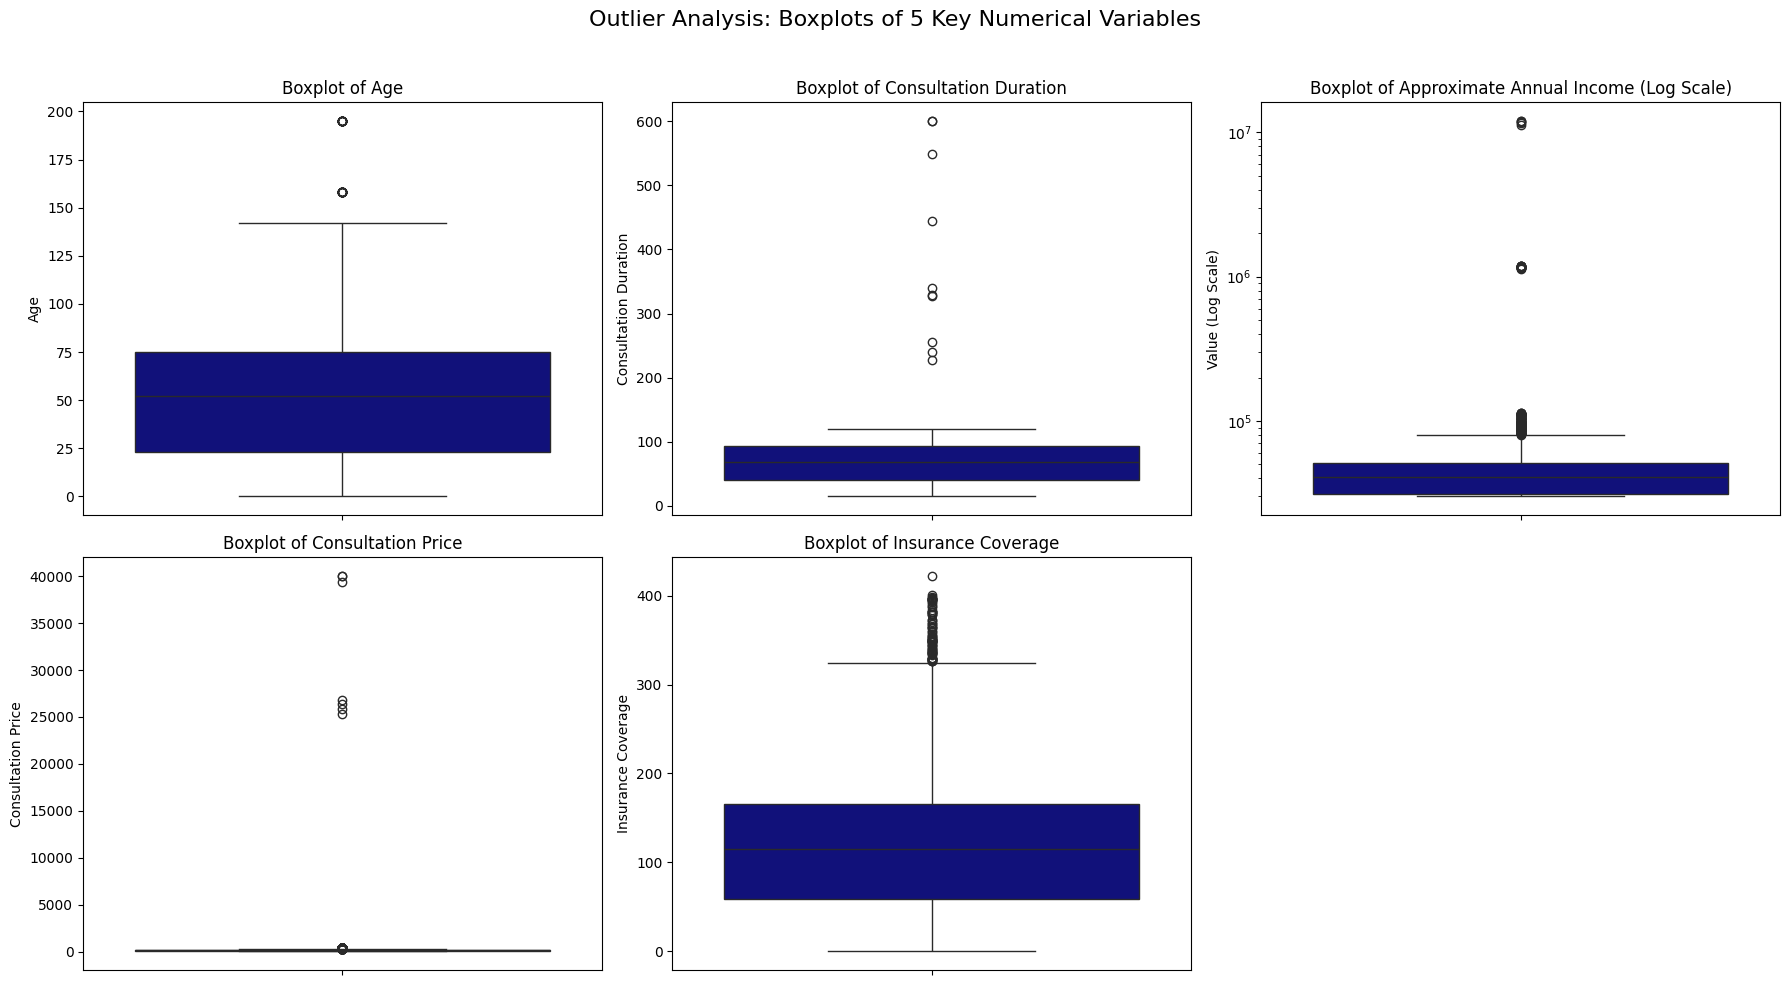

In [1097]:
plt.figure(figsize=(18, 10))
plt.suptitle('Outlier Analysis: Boxplots of 5 Key Numerical Variables', fontsize=16)

for i in range(len(numerical_cols_outliers)):
    col = numerical_cols_outliers[i]
    
    # FIX: Use 2 rows, 3 columns (6 slots) to fit 5 plots neatly
    plt.subplot(2, 3, i + 1) 
    
    sns.boxplot(y=project_data[col], color='darkblue')
    
    # Criticality: Applying log scale for better visualization of highly skewed income
    if col == 'Approximate Annual Income':
        plt.yscale('log')
        plt.ylabel('Value (Log Scale)')
        plt.title(f'Boxplot of {col} (Log Scale)')
    else:
        plt.title(f'Boxplot of {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])

In [1098]:
def get_percentile(series, percentile):
    return series.quantile(percentile / 100)

In [1099]:
def cap_outliers(series, lower_bound, upper_bound):
    return np.clip(series, lower_bound, upper_bound)

In [1100]:
for col in numerical_cols_outliers:
    # Calculate 1st and 99th percentile thresholds
    p1 = get_percentile(project_data[col].dropna(), 1)
    p99 = get_percentile(project_data[col].dropna(), 99)
    
    # Critical Check: Ensure the lower bound is not negative (e.g., Age)
    lower_bound = max(0, p1)
    
    # Apply the capping function
    project_data[col] = cap_outliers(project_data[col], lower_bound, p99)
    
    # Report the action
    print(f"[{col}]: Capped values below {lower_bound:.2f} and above {p99:.2f}")

[Age]: Capped values below 0.00 and above 118.00
[Consultation Duration]: Capped values below 16.00 and above 119.00
[Approximate Annual Income]: Capped values below 0.00 and above 86040.29
[Consultation Price]: Capped values below 52.62 and above 374.25
[Insurance Coverage]: Capped values below 0.00 and above 313.96


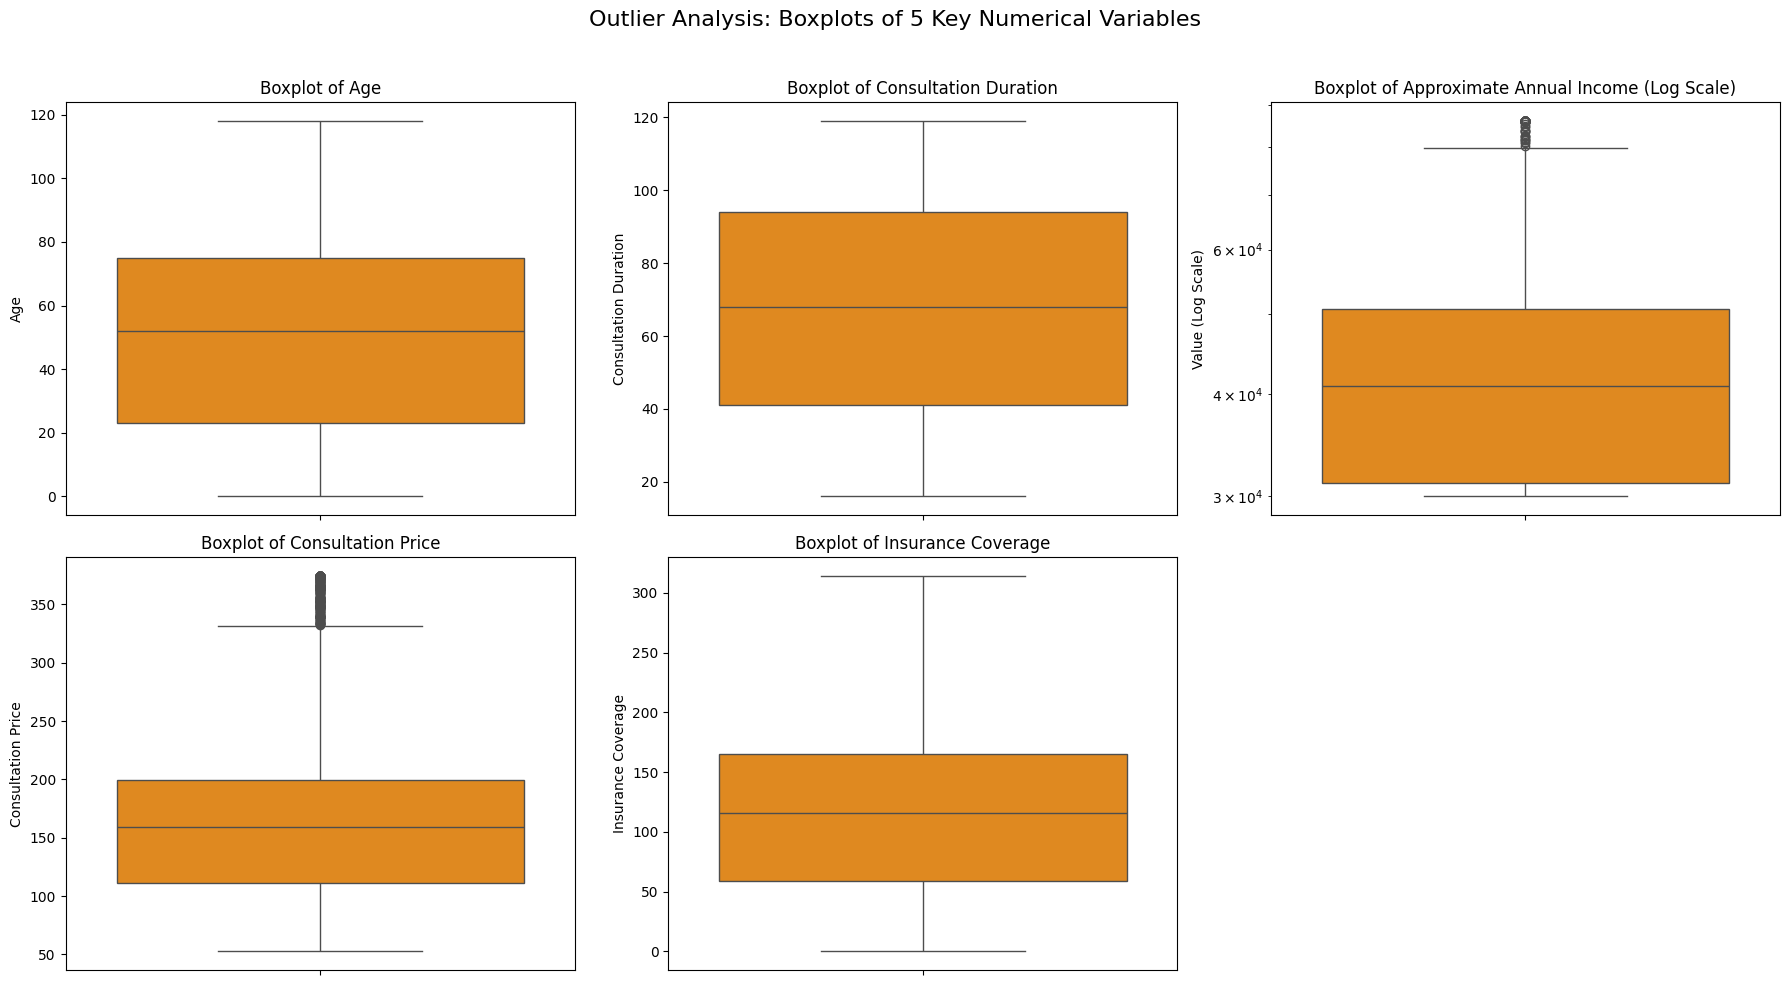

In [1102]:
plt.figure(figsize=(18, 10))
plt.suptitle('Outlier Analysis: Boxplots of 5 Key Numerical Variables', fontsize=16)

for i in range(len(numerical_cols_outliers)):
    col = numerical_cols_outliers[i]
    
    # FIX: Use 2 rows, 3 columns (6 slots) to fit 5 plots neatly
    plt.subplot(2, 3, i + 1) 
    
    sns.boxplot(y=project_data[col], color='darkorange')
    
    # Criticality: Applying log scale for better visualization of highly skewed income
    if col == 'Approximate Annual Income':
        plt.yscale('log')
        plt.ylabel('Value (Log Scale)')
        plt.title(f'Boxplot of {col} (Log Scale)')
    else:
        plt.title(f'Boxplot of {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])

<hr style = "border: 3px solid #3D737D;">
<h2  style = "color : #3D737D;text-align : center;"> Part B: Feature Engineering & ABT Construction</h2>

<h3 style = "color : #3D737D;">Variable Inference</h3>

In [1103]:
project_data['Visit_Month'] = project_data['Visit Date'].dt.month

In [1104]:
project_data.head()

,Patient ID,Age,Gender,City of Residence,Profession,Insurance Provider,Family History,Education Level,Marital Status,Visit Date,Department,Consultation Duration,Satisfaction Level,Approximate Annual Income,Consultation Price,Insurance Coverage,Visit_Month
0,1482,65.0,Female,Birmingham,Retired,Provider D,Heart Disease,Master,Divorced,2024-02-22,Endocrinology,110,2,38839.0,293.014042,0.0,2
1,1482,65.0,Female,Birmingham,Retired,Provider D,Heart Disease,Master,Divorced,2024-01-21,Emergency,76,4,52219.0,287.208982,0.0,1
2,1482,65.0,Female,Birmingham,Retired,Provider D,Heart Disease,Master,Divorced,2024-06-13,Neurology,17,5,41491.0,241.254507,0.0,6
3,1482,65.0,Female,Birmingham,Retired,Provider D,Heart Disease,Master,Divorced,2024-03-24,Emergency,16,3,34944.0,221.177483,0.0,3
4,1482,65.0,Female,Birmingham,Retired,Provider D,Heart Disease,Master,Divorced,2024-03-19,Neurology,99,1,39248.0,219.743794,0.0,3


Aggregate all patients with same ID in a single row

In [1105]:
project_data['Patient ID'].nunique()

500

<p>We expect to have the final ABT with 500 rows (one for each Patient), or less if we drop any patient</p>

<h3 style = "color : #3D737D;"> Step 1: Feature Aggregation</h3>

In [1106]:
ABT_city_hospital = project_data.groupby('Patient ID').agg(
    
    # Static Information
    Current_Age=('Age', 'last'),
    Current_Gender = ('Gender', 'last'),
    City_of_Residence = ('City of Residence', 'first'),
    Current_Profession = ('Profession', 'last'),
    Current_Insurance_Provider = ('Insurance Provider', 'last'),
    Family_History = ('Family History', 'first'),
    Education_Level = ('Education Level', 'first'),
    Current_Marital_Status = ('Marital Status', 'last'),

    # Activity/Frequency (F)
    Total_Visits=('Visit Date', 'count'), 
    
    # Monetary (M)
    Total_Spent_Amount=('Consultation Price', 'sum'),
    
    # Satisfaction & Service Averages
    Avg_Consultation_Duration=('Consultation Duration', 'mean'),
    Avg_Concultation_Price=('Consultation Price', 'mean'),
    Avg_Satisfaction_Level=('Satisfaction Level', 'mean'),
    Avg_Insurance_Coverage=('Insurance Coverage', 'mean'),
    
    # Time-related for Recency/Tenure (Max/Min Date)
    Last_Visit_Date=('Visit Date', 'max'),
    First_Visit_Date=('Visit Date', 'min')
    
).reset_index()


rounding_map = {
    'Avg_Consultation_Duration': 0,
    'Avg_Concultation_Price': 2,
    'Avg_Satisfaction_Level': 2,
    'Avg_Insurance_Coverage': 2
}

# The .round() method applies the precision defined in the dictionary
ABT_city_hospital = ABT_city_hospital.round(rounding_map)

In [1107]:
ABT_city_hospital.head()

,Patient ID,Current_Age,Current_Gender,City_of_Residence,Current_Profession,Current_Insurance_Provider,Family_History,Education_Level,Current_Marital_Status,Total_Visits,Total_Spent_Amount,Avg_Consultation_Duration,Avg_Concultation_Price,Avg_Satisfaction_Level,Avg_Insurance_Coverage,Last_Visit_Date,First_Visit_Date
0,1000,118.0,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,20,3497.062357,66.0,174.85,2.60,171.84,2024-06-27,2024-01-01
1,1001,55.0,Male,Liverpool,Lawyer,Provider C,Heart Disease,Undergraduate,Married,16,2396.985814,60.0,149.81,2.62,104.87,2024-06-27,2024-01-02
2,1002,10.0,Female,Liverpool,Student,Provider C,Cancer,Elementary school,Single,18,2919.254806,71.0,162.18,3.28,113.53,2024-06-23,2024-01-06
3,1003,91.0,Male,Manchester,Retired,Provider A,Cancer,Master,Married,25,4485.140348,61.0,179.41,3.00,143.56,2024-06-29,2024-01-03
4,1004,11.0,Male,Glasgow,Student,Provider B,Cancer,Middle school/junior high,Single,26,4486.940577,63.0,172.57,2.92,155.29,2024-06-28,2024-01-01


In [1108]:
ABT_city_hospital.shape

(500, 17)

In [1109]:
ABT_city_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Patient ID                  500 non-null    int64         
 1   Current_Age                 500 non-null    float64       
 2   Current_Gender              500 non-null    object        
 3   City_of_Residence           500 non-null    object        
 4   Current_Profession          500 non-null    object        
 5   Current_Insurance_Provider  500 non-null    object        
 6   Family_History              500 non-null    object        
 7   Education_Level             500 non-null    object        
 8   Current_Marital_Status      500 non-null    object        
 9   Total_Visits                500 non-null    int64         
 10  Total_Spent_Amount          500 non-null    float64       
 11  Avg_Consultation_Duration   500 non-null    float64       

<h3 style = "color : #3D737D;"> Step 2: Time-Based Feature Construction</h3>

In [1110]:
# Setting the reference date to 1st of July 2024
reference_date = pd.to_datetime(ABT_city_hospital['Last_Visit_Date']).max() + pd.Timedelta(days=1)

# Days since the patient's last visit (Last_Visit_Date)
ABT_city_hospital['Days_Since_Last_Visit'] = (reference_date - pd.to_datetime(ABT_city_hospital['Last_Visit_Date'])).dt.days

# Total days the patient has been active
ABT_city_hospital['Days_Since_First_Visit'] = (reference_date - pd.to_datetime(ABT_city_hospital['First_Visit_Date'])).dt.days

# Frequency per Month.
ABT_city_hospital['Avg_Visits_per_Month'] = (ABT_city_hospital['Total_Visits'] / ((ABT_city_hospital['Days_Since_First_Visit'] + 1) / 30)).round(1)


ABT_city_hospital.head()

,Patient ID,Current_Age,Current_Gender,City_of_Residence,Current_Profession,Current_Insurance_Provider,Family_History,Education_Level,Current_Marital_Status,Total_Visits,Total_Spent_Amount,Avg_Consultation_Duration,Avg_Concultation_Price,Avg_Satisfaction_Level,Avg_Insurance_Coverage,Last_Visit_Date,First_Visit_Date,Days_Since_Last_Visit,Days_Since_First_Visit,Avg_Visits_per_Month
0,1000,118.0,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,20,3497.062357,66.0,174.85,2.60,171.84,2024-06-27,2024-01-01,4,182,3.3
1,1001,55.0,Male,Liverpool,Lawyer,Provider C,Heart Disease,Undergraduate,Married,16,2396.985814,60.0,149.81,2.62,104.87,2024-06-27,2024-01-02,4,181,2.6
2,1002,10.0,Female,Liverpool,Student,Provider C,Cancer,Elementary school,Single,18,2919.254806,71.0,162.18,3.28,113.53,2024-06-23,2024-01-06,8,177,3.0
3,1003,91.0,Male,Manchester,Retired,Provider A,Cancer,Master,Married,25,4485.140348,61.0,179.41,3.00,143.56,2024-06-29,2024-01-03,2,180,4.1
4,1004,11.0,Male,Glasgow,Student,Provider B,Cancer,Middle school/junior high,Single,26,4486.940577,63.0,172.57,2.92,155.29,2024-06-28,2024-01-01,3,182,4.3


In [1111]:
pd.set_option('display.max_columns', None)

In [1112]:
temporal_pattern_features = pd.crosstab(
    project_data['Patient ID'], 
    project_data['Visit_Month']
)

# Rename columns to ensure clear naming (e.g., 1 -> Visit_Month_01)
month_column_mapping = {m: f'Visit_Month_{m:02d}' for m in range(1, 7)}
temporal_pattern_features.rename(columns=month_column_mapping, inplace=True)
temporal_pattern_features.fillna(0, inplace=True) 
temporal_pattern_features.reset_index(inplace=True)

ABT_city_hospital = ABT_city_hospital.merge(temporal_pattern_features, on='Patient ID', how='left') 
ABT_city_hospital.head()

,Patient ID,Current_Age,Current_Gender,City_of_Residence,Current_Profession,Current_Insurance_Provider,Family_History,Education_Level,Current_Marital_Status,Total_Visits,Total_Spent_Amount,Avg_Consultation_Duration,Avg_Concultation_Price,Avg_Satisfaction_Level,Avg_Insurance_Coverage,Last_Visit_Date,First_Visit_Date,Days_Since_Last_Visit,Days_Since_First_Visit,Avg_Visits_per_Month,Visit_Month_01,Visit_Month_02,Visit_Month_03,Visit_Month_04,Visit_Month_05,Visit_Month_06
0,1000,118.0,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,20,3497.062357,66.0,174.85,2.60,171.84,2024-06-27,2024-01-01,4,182,3.3,3,2,6,3,3,3
1,1001,55.0,Male,Liverpool,Lawyer,Provider C,Heart Disease,Undergraduate,Married,16,2396.985814,60.0,149.81,2.62,104.87,2024-06-27,2024-01-02,4,181,2.6,4,3,3,1,3,2
2,1002,10.0,Female,Liverpool,Student,Provider C,Cancer,Elementary school,Single,18,2919.254806,71.0,162.18,3.28,113.53,2024-06-23,2024-01-06,8,177,3.0,3,4,3,1,4,3
3,1003,91.0,Male,Manchester,Retired,Provider A,Cancer,Master,Married,25,4485.140348,61.0,179.41,3.00,143.56,2024-06-29,2024-01-03,2,180,4.1,3,3,5,5,5,4
4,1004,11.0,Male,Glasgow,Student,Provider B,Cancer,Middle school/junior high,Single,26,4486.940577,63.0,172.57,2.92,155.29,2024-06-28,2024-01-01,3,182,4.3,7,2,4,4,2,7


In [1113]:
department_counts = pd.crosstab(
    project_data['Patient ID'], project_data['Department']
).add_prefix('Dept_Count_')
ABT_city_hospital = ABT_city_hospital.merge(department_counts, on='Patient ID', how='left')
ABT_city_hospital.head()

,Patient ID,Current_Age,Current_Gender,City_of_Residence,Current_Profession,Current_Insurance_Provider,Family_History,Education_Level,Current_Marital_Status,Total_Visits,Total_Spent_Amount,Avg_Consultation_Duration,Avg_Concultation_Price,Avg_Satisfaction_Level,Avg_Insurance_Coverage,Last_Visit_Date,First_Visit_Date,Days_Since_Last_Visit,Days_Since_First_Visit,Avg_Visits_per_Month,Visit_Month_01,Visit_Month_02,Visit_Month_03,Visit_Month_04,Visit_Month_05,Visit_Month_06,Dept_Count_Allergology,Dept_Count_Cardiology,Dept_Count_Dermatology,Dept_Count_ENT,Dept_Count_Emergency,Dept_Count_Endocrinology,Dept_Count_Gastroenterology,Dept_Count_General Practice,Dept_Count_Neurology,Dept_Count_Orthopedics,Dept_Count_Psychiatry,Dept_Count_Pulmonology,Dept_Count_Rheumatology
0,1000,118.0,Female,Birmingham,Artist,Provider D,Hypertension,Undergraduate,Divorced,20,3497.062357,66.0,174.85,2.60,171.84,2024-06-27,2024-01-01,4,182,3.3,3,2,6,3,3,3,3,2,1,1,2,2,0,2,0,0,2,3,2
1,1001,55.0,Male,Liverpool,Lawyer,Provider C,Heart Disease,Undergraduate,Married,16,2396.985814,60.0,149.81,2.62,104.87,2024-06-27,2024-01-02,4,181,2.6,4,3,3,1,3,2,1,2,0,3,2,1,1,2,1,0,1,0,2
2,1002,10.0,Female,Liverpool,Student,Provider C,Cancer,Elementary school,Single,18,2919.254806,71.0,162.18,3.28,113.53,2024-06-23,2024-01-06,8,177,3.0,3,4,3,1,4,3,3,0,1,1,0,0,1,1,3,1,5,1,1
3,1003,91.0,Male,Manchester,Retired,Provider A,Cancer,Master,Married,25,4485.140348,61.0,179.41,3.00,143.56,2024-06-29,2024-01-03,2,180,4.1,3,3,5,5,5,4,1,0,0,2,2,3,1,1,3,2,5,1,4
4,1004,11.0,Male,Glasgow,Student,Provider B,Cancer,Middle school/junior high,Single,26,4486.940577,63.0,172.57,2.92,155.29,2024-06-28,2024-01-01,3,182,4.3,7,2,4,4,2,7,1,3,0,0,3,2,4,5,5,0,2,1,0


In [1114]:
ABT_city_hospital.set_index('Patient ID', inplace=True)

In [1115]:
ABT_city_hospital['Current_Age'] = ABT_city_hospital['Current_Age'].astype('int64')

categorical_cols_to_convert = [
    'Current_Gender',
    'City_of_Residence',
    'Current_Profession',
    'Current_Insurance_Provider',
    'Family_History',
    'Education_Level',
    'Current_Marital_Status'
]

conversion_map = {col: 'category' for col in categorical_cols_to_convert}

ABT_city_hospital = ABT_city_hospital.astype(conversion_map)

In [1116]:
ABT_city_hospital.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1000 to 1499
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Current_Age                  500 non-null    int64         
 1   Current_Gender               500 non-null    category      
 2   City_of_Residence            500 non-null    category      
 3   Current_Profession           500 non-null    category      
 4   Current_Insurance_Provider   500 non-null    category      
 5   Family_History               500 non-null    category      
 6   Education_Level              500 non-null    category      
 7   Current_Marital_Status       500 non-null    category      
 8   Total_Visits                 500 non-null    int64         
 9   Total_Spent_Amount           500 non-null    float64       
 10  Avg_Consultation_Duration    500 non-null    float64       
 11  Avg_Concultation_Price       500 non-null    f

<hr style = "border: 3px solid #3D737D;">
<h2  style = "color : #3D737D;text-align : center;"> Part C: Exploratory Visualization & Insights</h2>

In [1117]:
#visits over time 



In [1118]:
#visits per department
project_data['Visit Date'].max()

Timestamp('2024-06-30 00:00:00')

In [1119]:
project_data['Visit Date'].min()

Timestamp('2024-01-01 00:00:00')

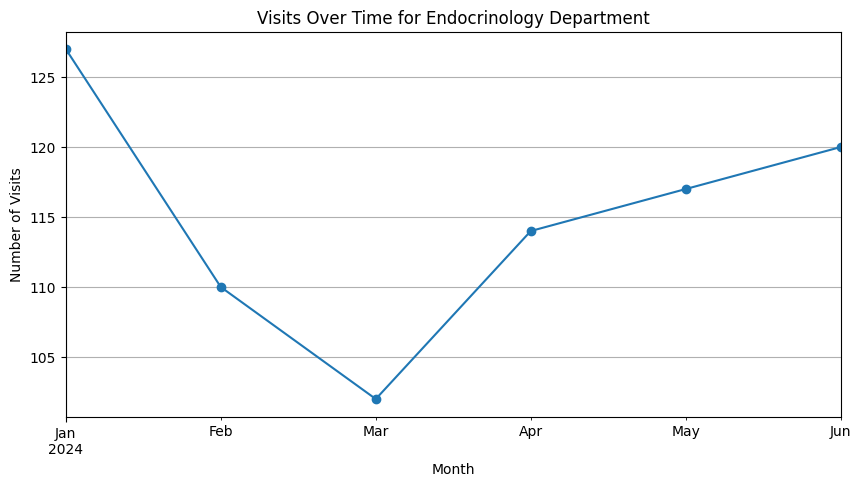

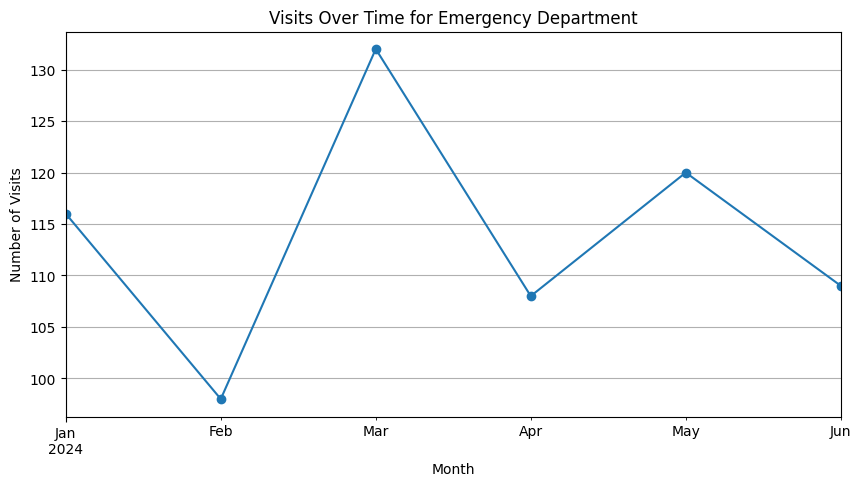

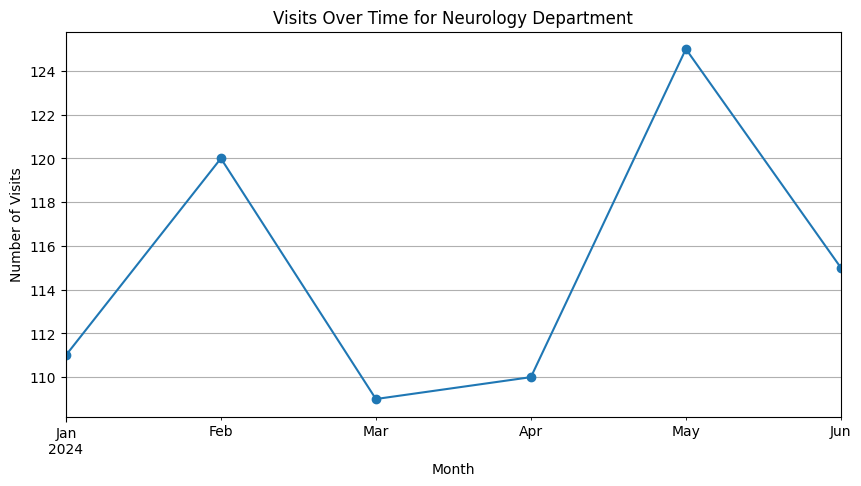

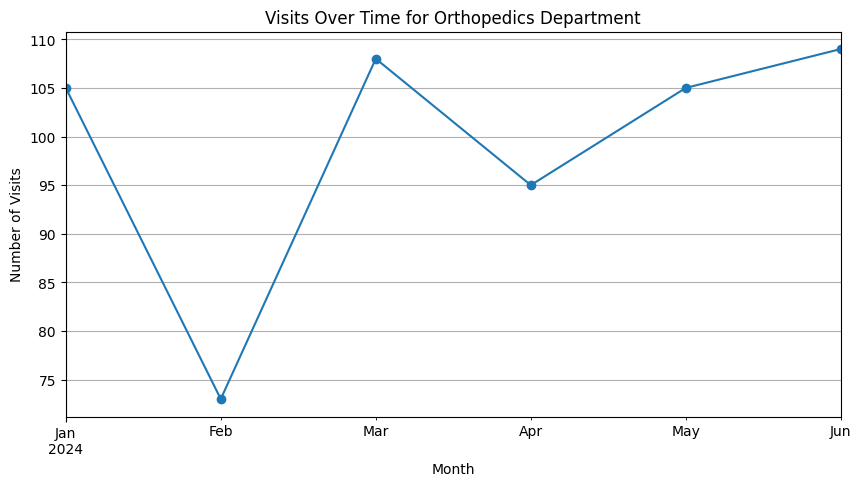

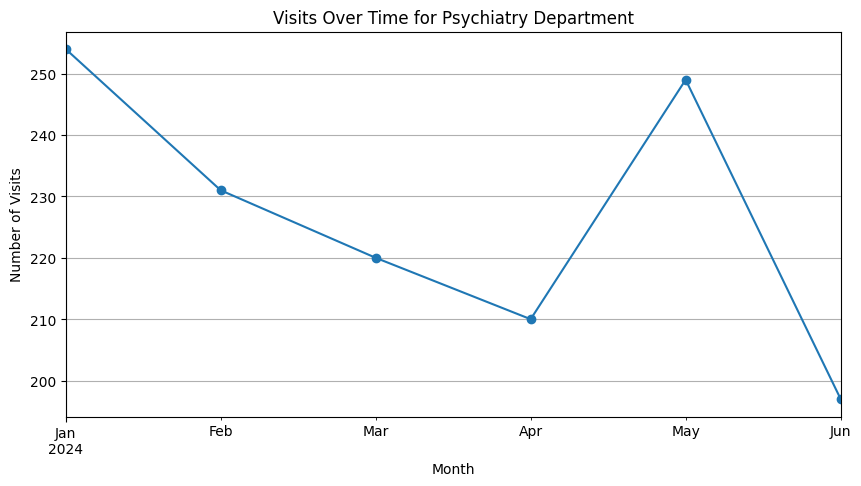

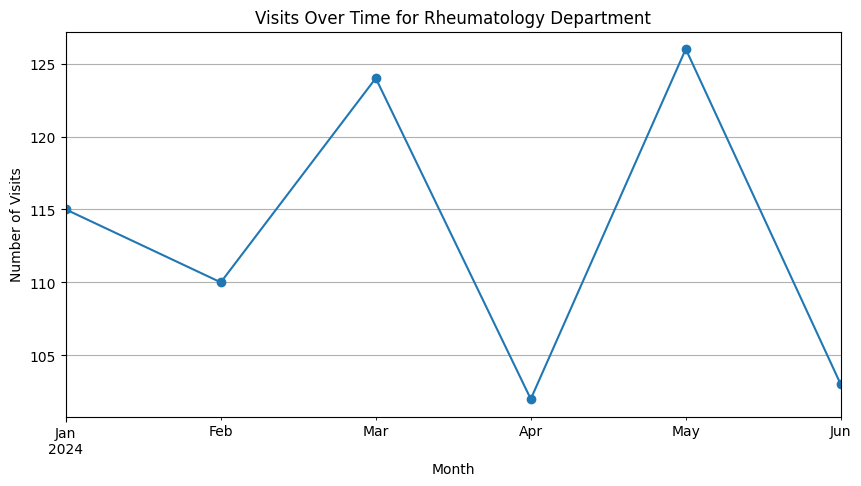

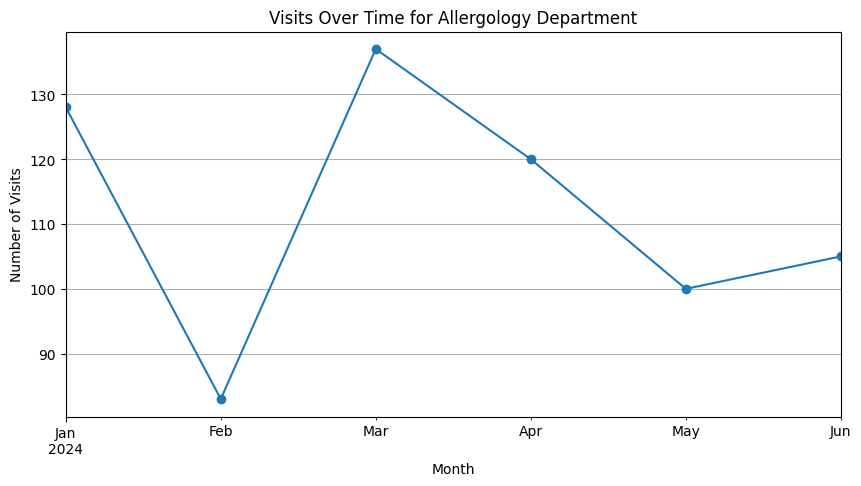

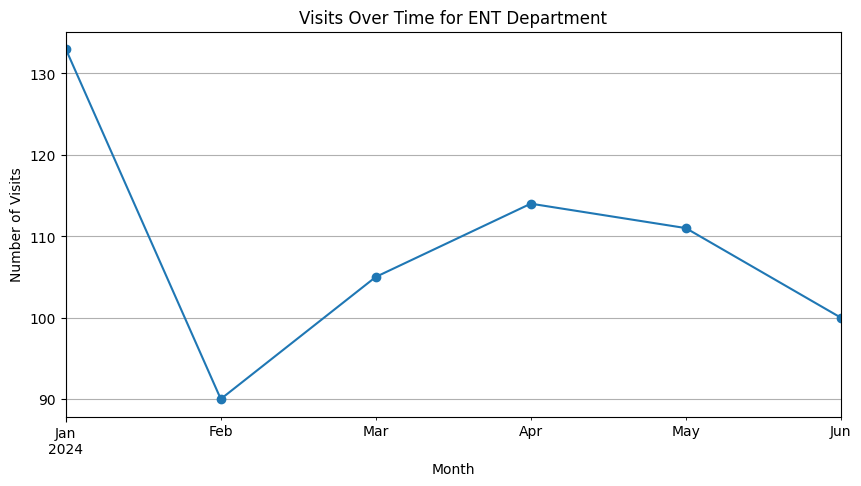

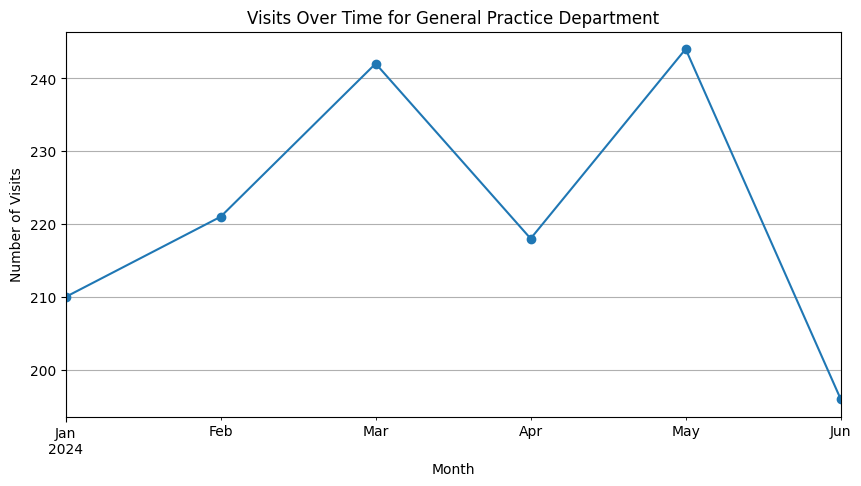

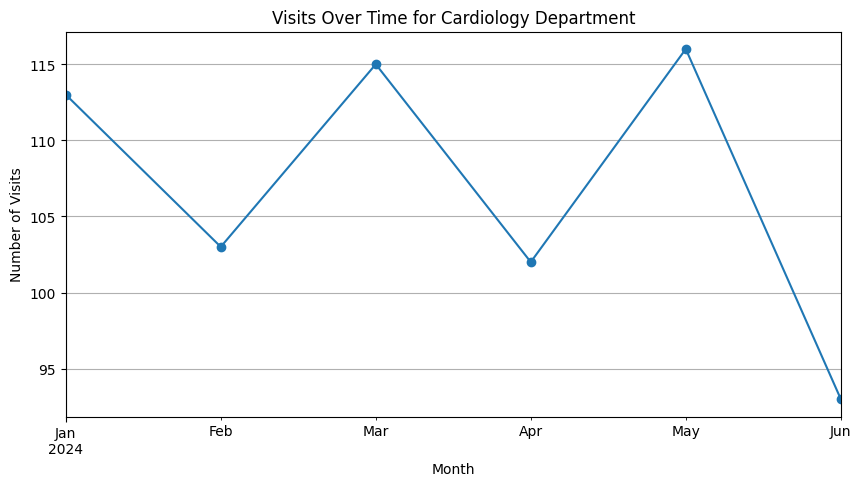

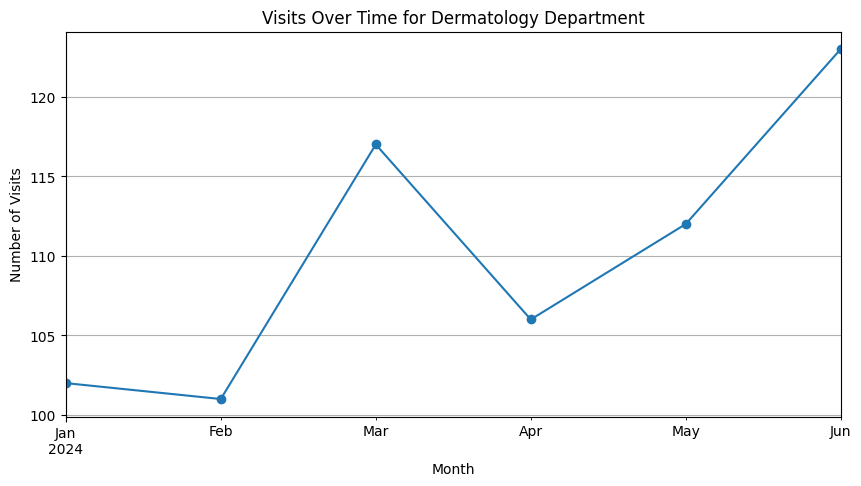

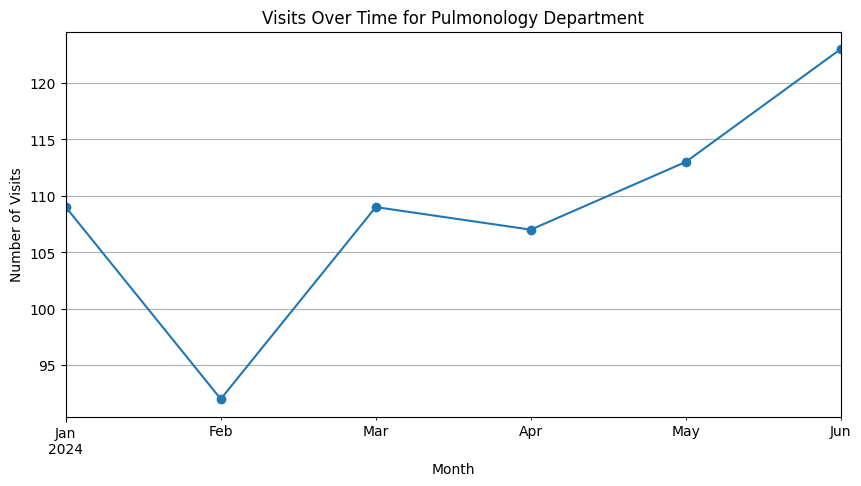

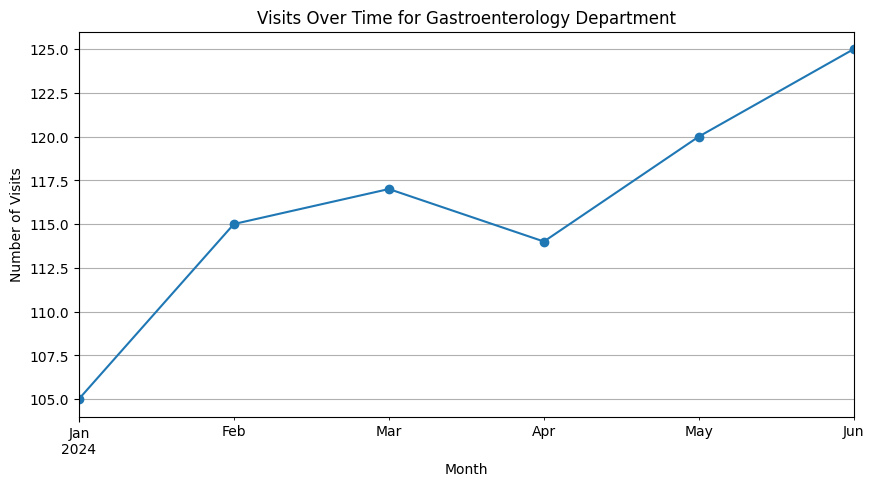

In [1120]:
for department in project_data['Department'].unique():
    dept_data = project_data[project_data['Department'] == department]
    visits_over_time = dept_data.groupby(dept_data['Visit Date'].dt.to_period('M')).size()
    
    plt.figure(figsize=(10, 5))
    visits_over_time.plot(marker='o')
    plt.title(f'Visits Over Time for {department} Department')
    plt.xlabel('Month')
    plt.ylabel('Number of Visits')
    plt.grid()
    plt.show()

In [1121]:
departments = list(project_data['Department'].unique())

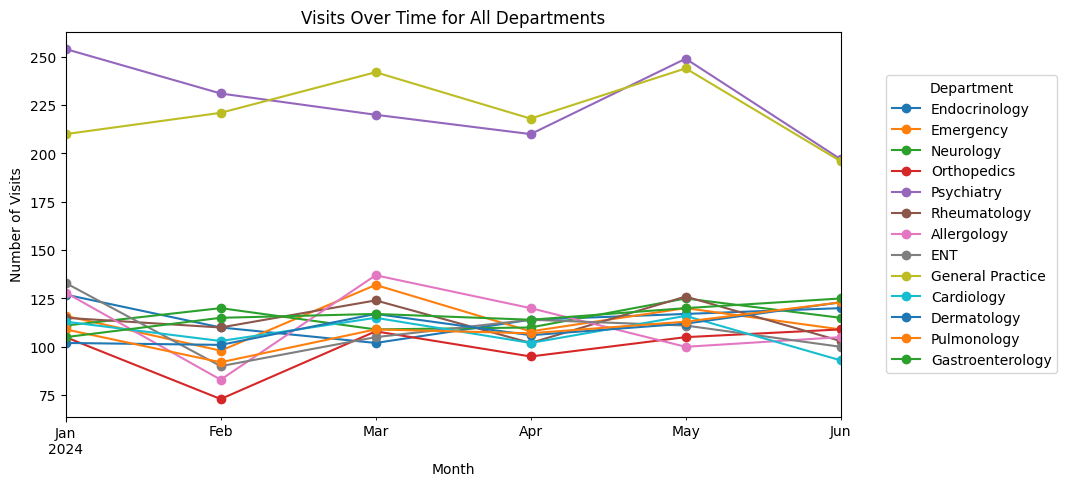

In [1122]:
plt.figure(figsize=(10, 5)) 

plt.title('Visits Over Time for All Departments')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.grid(True)

#one for all departments
for department in project_data['Department'].unique():
    dept_data = project_data[project_data['Department'] == department]
    visits_over_time = dept_data.groupby(dept_data['Visit Date'].dt.to_period('M')).size()
    visits_over_time.index.name = None 
    visits_over_time.plot(marker='o', label=department) 

# Legend Location
plt.legend(title='Department', loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.show()

In [1123]:
print(departments)

['Endocrinology', 'Emergency', 'Neurology', 'Orthopedics', 'Psychiatry', 'Rheumatology', 'Allergology', 'ENT', 'General Practice', 'Cardiology', 'Dermatology', 'Pulmonology', 'Gastroenterology']



Department: Allergology
Visit_Month
2024-01    128
2024-02     83
2024-03    137
2024-04    120
2024-05    100
2024-06    105

Department: Cardiology
Visit_Month
2024-01    113
2024-02    103
2024-03    115
2024-04    102
2024-05    116
2024-06     93

Department: Dermatology
Visit_Month
2024-01    102
2024-02    101
2024-03    117
2024-04    106
2024-05    112
2024-06    123

Department: ENT
Visit_Month
2024-01    133
2024-02     90
2024-03    105
2024-04    114
2024-05    111
2024-06    100

Department: Emergency
Visit_Month
2024-01    116
2024-02     98
2024-03    132
2024-04    108
2024-05    120
2024-06    109

Department: Endocrinology
Visit_Month
2024-01    127
2024-02    110
2024-03    102
2024-04    114
2024-05    117
2024-06    120

Department: Gastroenterology
Visit_Month
2024-01    105
2024-02    115
2024-03    117
2024-04    114
2024-05    120
2024-06    125

Department: General Practice
Visit_Month
2024-01    210
2024-02    221
2024-03    242
2024-04    218
2024-05    24

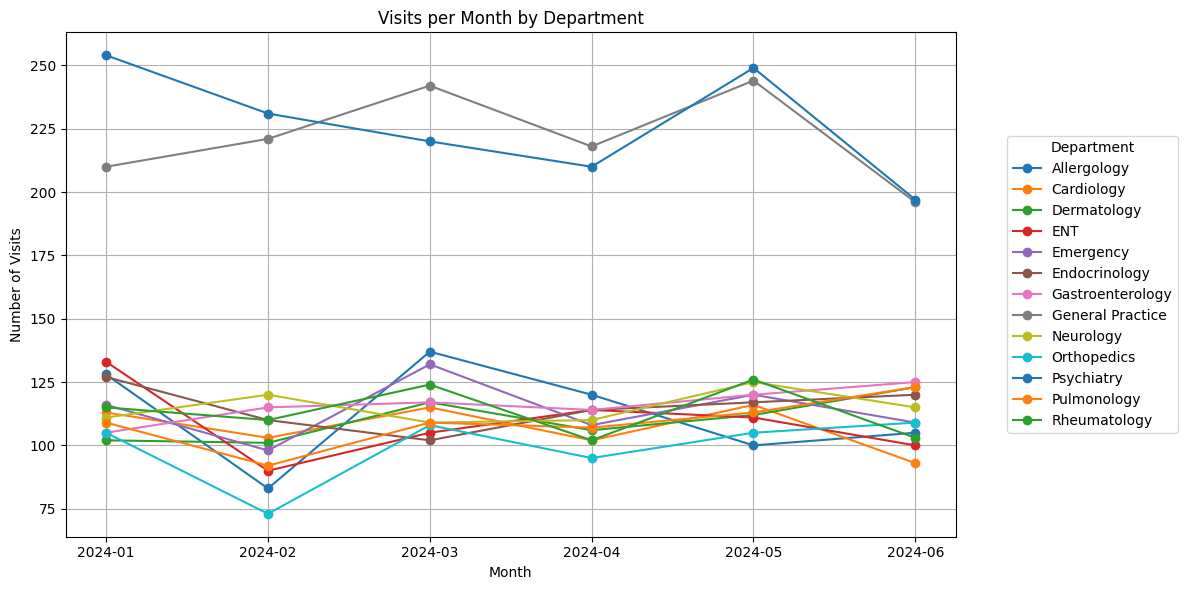

In [1124]:
# Print actual total visits per month for each department (cleaner output + pivot + plot)
# Compute counts per month (PeriodIndex: YYYY-MM)
project_data['Visit_Month'] = project_data['Visit Date'].dt.to_period('M')

# 1) Print each department's monthly totals
for dept in sorted(project_data['Department'].unique()):
    counts = (
        project_data.loc[project_data['Department'] == dept, 'Visit_Month']
        .value_counts()
        .sort_index()
    )
    if counts.empty:
        print(f"\nDepartment: {dept} - No visits found")
        continue
    print(f"\nDepartment: {dept}")
    # value_counts returns a Series with PeriodIndex; convert to string for readable months
    counts.index = counts.index.astype(str)
    print(counts.to_string())

# 2) Create a pivot table (months x departments) for a compact overview
visits_pivot = pd.crosstab(project_data['Visit_Month'], project_data['Department'])
# Sort index (PeriodIndex) and convert index to string for nicer printing
visits_pivot = visits_pivot.sort_index()
visits_pivot.index = visits_pivot.index.astype(str)

print('\nTotal visits per month (pivot table):')
print(visits_pivot)

# 3) Optional: plot the pivot table as a line chart for visual inspection
try:
    visits_pivot.plot(kind='line', marker='o', figsize=(12, 6))
    plt.xlabel('Month')
    plt.ylabel('Number of Visits')
    plt.title('Visits per Month by Department')
    plt.grid(True)
    plt.legend(title='Department', loc='center left', bbox_to_anchor=(1.05, 0.5))
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"\nPlot failed: {e}")